In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import seaborn as sns

In [3]:
# Import the data frame
goal_stats = pd.read_csv('ggoals_final.csv')

In [4]:
print(goal_stats)

        ...1        date              campaign  audience  creative_family  \
0          0  2022-04-01             (not set)       NaN              NaN   
1          1  2022-04-01             (not set)       NaN              NaN   
2          2  2022-04-01             (not set)       NaN              NaN   
3          3  2022-04-01             (not set)       NaN              NaN   
4          4  2022-04-01             (not set)       NaN              NaN   
...      ...         ...                   ...       ...              ...   
16506  16506  2022-10-26  FY23_broker_campaign       NaN  UnfairAdvantage   
16507  16507  2022-10-26  FY23_broker_campaign       NaN  UnfairAdvantage   
16508  16508  2022-10-28          Brand_Phrase       6.0          SEM Ads   
16509  16509         NaN                   NaN       NaN              NaN   
16510  16510         NaN                   NaN       NaN              NaN   

            creative_version        platform ad_format  \
0                

In [5]:
len(goal_stats)

16511

In [6]:
# Start grouping audiences together

group_aud = goal_stats.groupby('audience')

# View the new group

group_aud


In [7]:
# Determine the size of each audience
group_aud.size()

audience
1.0      68
2.0      23
3.0      21
4.0     110
5.0     153
6.0    3863
dtype: int64

In [8]:
# Start grouping audiences together

group_cam = goal_stats.groupby('campaign_traffic')

# View the new group

group_cam


In [9]:
# Determine sizes of campaign traffic
group_cam.size()

campaign_traffic
Campaign            4514
General traffic    11995
dtype: int64

In [10]:
# Determine which audience had the most number of completions
cmt = goal_stats.groupby('campaign_traffic')['completions'].sum()

cmt

# Sort in ascending order

acmt = cmt.sort_values(ascending=False)

acmt

campaign_traffic
General traffic    37886.0
Campaign            6153.0
Name: completions, dtype: float64

In [11]:
# subset data audiences for only 4, 5, 6
subset = goal_stats.loc[goal_stats['audience'].isin([4, 5, 6])]

In [12]:
# Determine which audience had the most number of completions
noc = goal_stats.groupby('audience')['completions'].sum()

noc

# Sort in ascending order

anoc = noc.sort_values(ascending=False)

anoc

audience
6.0    5489.0
5.0     155.0
4.0     110.0
1.0      69.0
2.0      23.0
3.0      21.0
Name: completions, dtype: float64

<AxesSubplot:title={'center':'Total goals completed by audience '}, xlabel='audience', ylabel='Goal completions'>

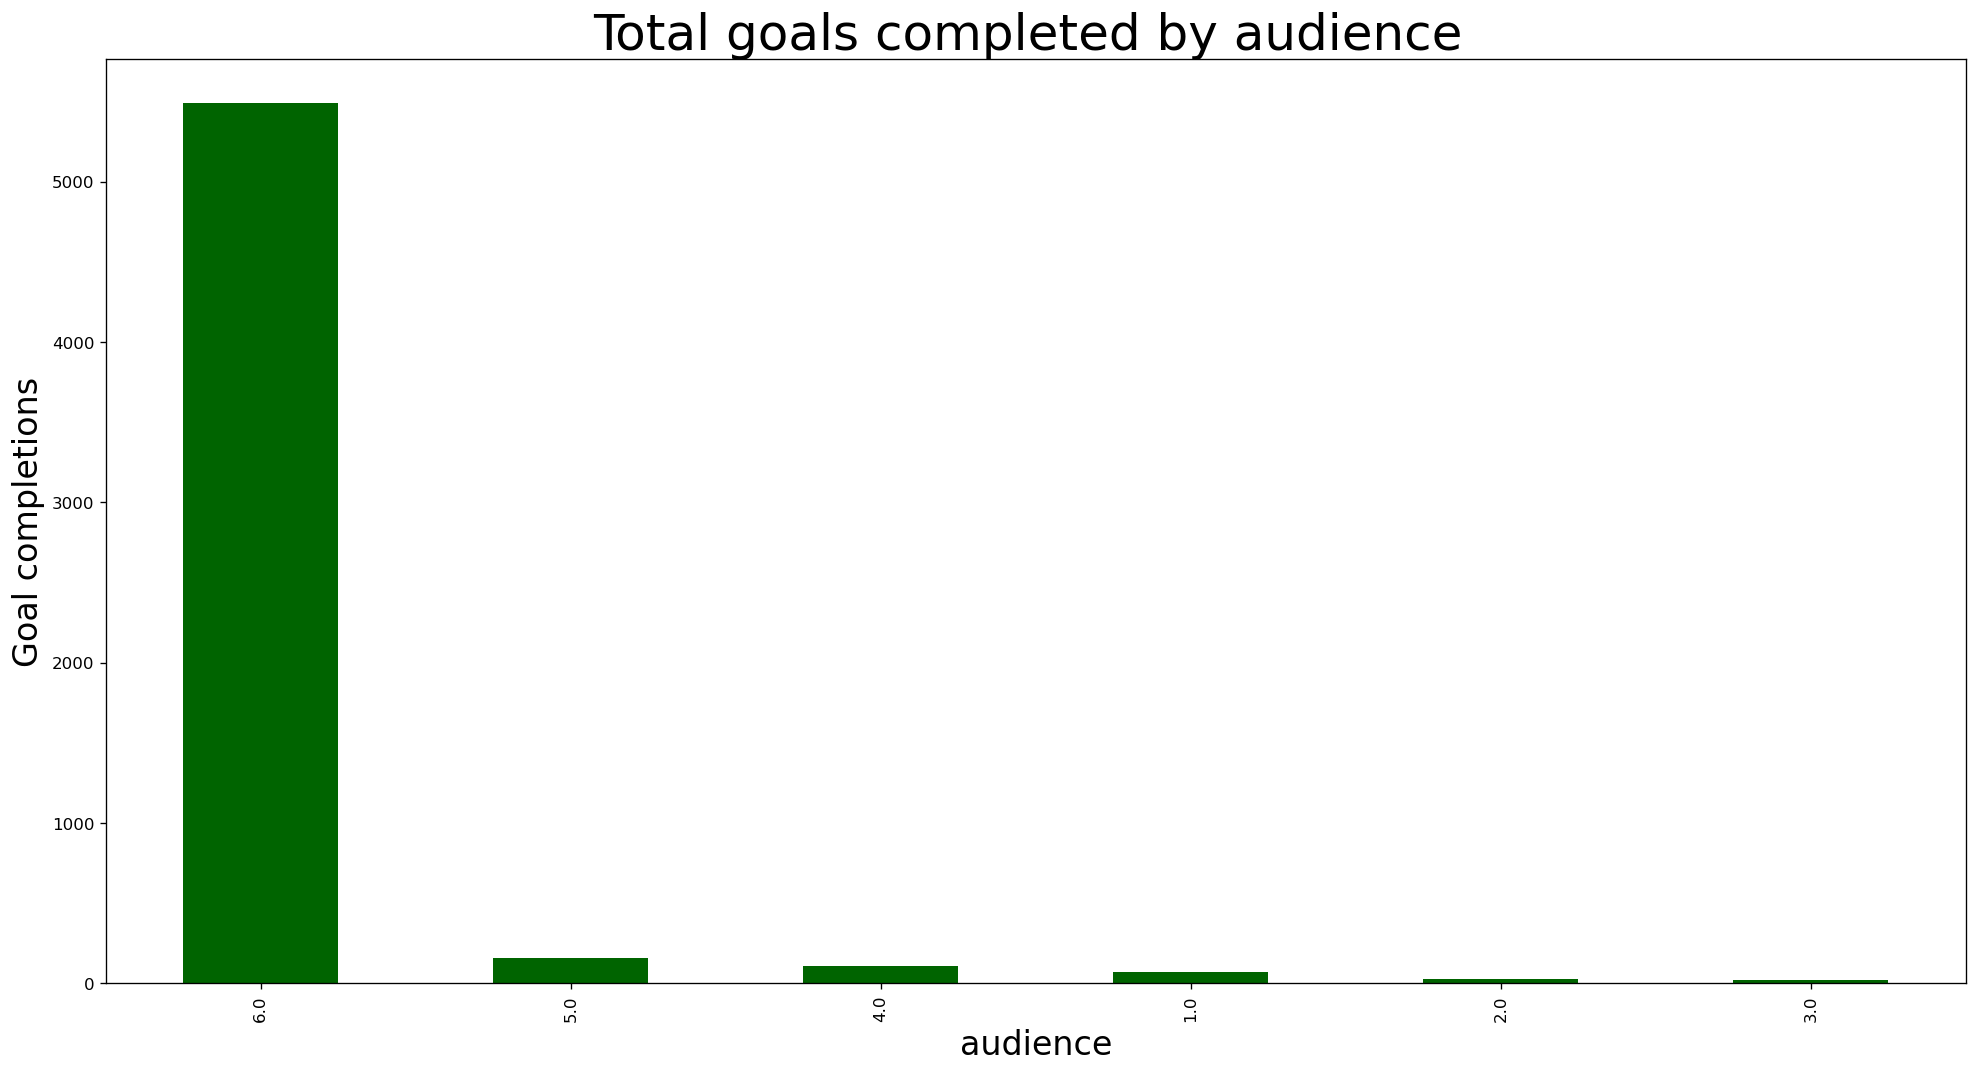

In [13]:
# Create a plot of goals by audience
plt.figure(figsize=(20,10), dpi=120)
plt.xlabel('Audience', fontsize = 20)
plt.ylabel('Goal completions', fontsize = 20)
plt.title('Total goals completed by audience ', fontsize = 30)
anoc.plot(x='audience', y='goal complations', kind='bar', color = 'darkgreen')

In [14]:
# Determine which goal had the most number of completions
noll = subset.groupby('goal')['completions'].sum()

# Sort in ascending order

anoll = noll.sort_values(ascending=False)

anoll

goal
Learn More (Community Mortgage)     3949.0
Start Closing More                   846.0
Get Approved                         308.0
Learn More (Our Story)               262.0
Learn More (Closer Twins Banner)     212.0
Form Submission                      104.0
Closer Twins Page Video Play          43.0
Broker Login                          23.0
Home Page Video Play                   5.0
4                                      1.0
utm_audience                           1.0
Name: completions, dtype: float64

Text(0, 0.5, 'Completions')

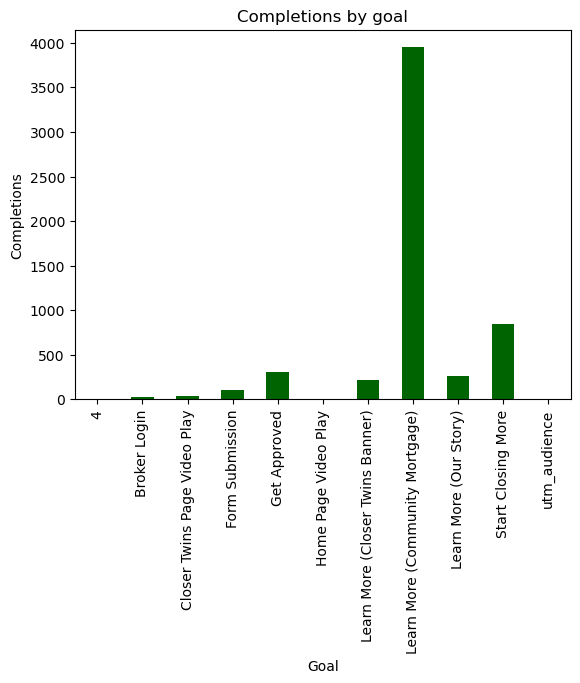

In [15]:
# Plot completions by goal
import matplotlib.pyplot as plot
noll.plot(kind="bar", color = 'darkgreen')
plot.xticks(horizontalalignment="center")
plot.title("Completions by goal")
plot.xlabel("Goal")
plot.ylabel("Completions")

In [16]:
# Determine which platform had the most number of completions in audiences 4-6
nop = subset.groupby('platform')['completions'].sum()

# Sort in ascending order

anop = nop.sort_values(ascending=False)

anop

platform
Google SEM         5102.0
Trade Media         364.0
LinkedIn            186.0
Domain Display       61.0
User ID Display      24.0
OTT                  15.0
Name: completions, dtype: float64

Text(0, 0.5, 'Completions')

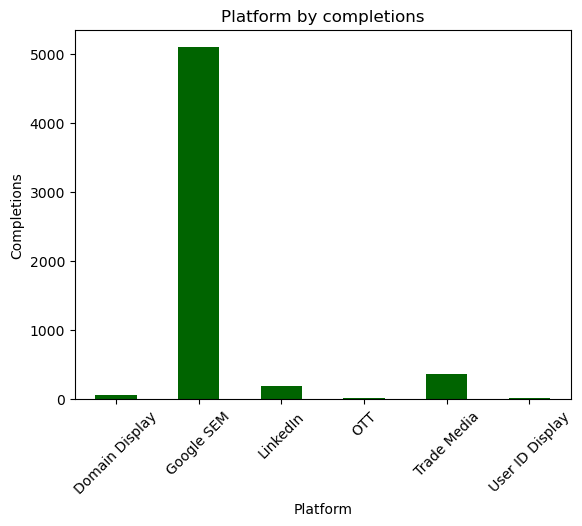

In [17]:
# PLot platform by completions for audiences 4-6
import matplotlib.pyplot as plot
nop.plot(kind="bar", color = 'darkgreen')
plot.xticks(rotation=45, horizontalalignment="center")
plot.title("Platform by completions")
plot.xlabel("Platform")
plot.ylabel("Completions")

In [18]:
# Determine which platform had the most number of completions
noccd = subset.groupby('creative_family')['completions'].sum()

# Sort in ascending order

anoccd = noccd.sort_values(ascending=False)

anoccd

creative_family
SEM Ads                   5102.0
Trade Media Ads            276.0
CloserTwins                172.0
UnfairAdvantage            136.0
CloseFaster                 58.0
CompetitiveOpportunity       8.0
Name: completions, dtype: float64

In [19]:
# Determine which ad format had the most number of completions
noa = subset.groupby('ad_format')['completions'].sum()

# Sort in ascending order

anoa = noa.sort_values(ascending=False)

anoa

ad_format
CPC                                   5102.0
Single image                           161.0
Housingwire                            133.0
Inside_mortgage_finance_newsletter      88.0
Scotsman                                78.0
Chrisman                                39.0
Carousel                                33.0
Video                                   30.0
National_mortgage_news                  17.0
Nmn                                      9.0
Animated                                 8.0
Name: completions, dtype: float64

In [20]:
# Determine which campaign had the most number of completions
noac = subset.groupby('campaign')['completions'].sum()

# Sort in ascending order

anoac = noac.sort_values(ascending=False)

anoac

campaign
Brand_Exact                   4021.0
Brand_Phrase                   532.0
(not set)                      393.0
FY23_change_digital_phase3     306.0
FY22_broker_campaign_ph2       198.0
NB_Wholesale_Phrase             90.0
FY23_broker_campaign            82.0
NB_Wholesale_Exact              68.0
Change_Wholesale_plusup         39.0
FY22_Broker_Campaign            15.0
FY22_broker_campaign             8.0
August_Mesaage                   2.0
Name: completions, dtype: float64

Text(0, 0.5, 'Completions')

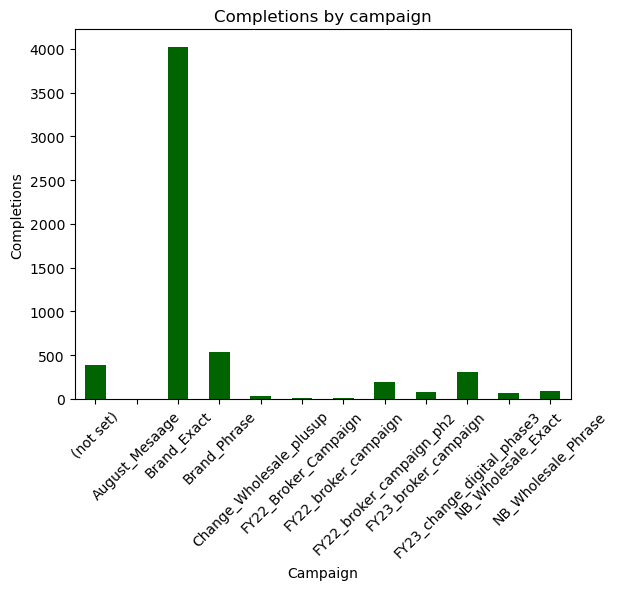

In [21]:
# PLot completions by campaign
import matplotlib.pyplot as plot
noac.plot(kind="bar", color = 'darkgreen')
plot.xticks(rotation=45, horizontalalignment="center")
plot.title("Completions by campaign")
plot.xlabel("Campaign")
plot.ylabel("Completions")


In [22]:
# Determine which creative family had the most number of completions
nocf = subset.groupby('creative_family')['completions'].sum()

# Sort in ascending order

anocf = nocf.sort_values(ascending=False)

anocf

creative_family
SEM Ads                   5102.0
Trade Media Ads            276.0
CloserTwins                172.0
UnfairAdvantage            136.0
CloseFaster                 58.0
CompetitiveOpportunity       8.0
Name: completions, dtype: float64

In [23]:
# Determine which creative family had the most number of completions
nocv = subset.groupby('creative_version')['completions'].sum()

# Sort in ascending order

anocv = nocv.sort_values(ascending=False)

anocv

creative_version
Change Wholesale             4491.0
We Are America's CDFI         119.0
ROS1                          109.0
Close More. Close Faster.     101.0
RTB                            88.0
Rate Lock                      87.0
NoDTI                          61.0
one_page                       35.0
All                            33.0
EarlyBird                      29.0
3steps                         26.0
ROS5                           22.0
1099                           19.0
300x250                        15.0
OTT_30                         12.0
MoreLoansAll                   11.0
Animated                        8.0
FasterAll                       6.0
Cutdown1A                       6.0
Faceoff                         6.0
MoreAll                         5.0
Theycancelweclose               4.0
Cancelingyourlock               4.0
Cutdown1B                       4.0
Competitors                     3.0
Namaste                         3.0
OTT_15                          2.0
Paperwork  

In [24]:
# Determine which campaign traffic had the most number of completions
noct = subset.groupby('campaign_traffic')['completions'].sum()

# Sort in ascending order

anoct = noct.sort_values(ascending=False)

anoct

campaign_traffic
Campaign           5711.0
General traffic      43.0
Name: completions, dtype: float64

In [25]:
# Change the date format to months

from datetime import datetime

# View datatype of date column
goal_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16511 entries, 0 to 16510
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ...1              16511 non-null  int64  
 1   date              16509 non-null  object 
 2   campaign          16509 non-null  object 
 3   audience          4238 non-null   float64
 4   creative_family   4544 non-null   object 
 5   creative_version  4253 non-null   object 
 6   platform          4549 non-null   object 
 7   ad_format         4427 non-null   object 
 8   goal              16509 non-null  object 
 9   completions       16509 non-null  float64
 10  campaign_traffic  16509 non-null  object 
 11  days_away         16509 non-null  float64
 12  latest_report     16509 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.6+ MB


In [26]:
# convert the date column to datetime format
goal_stats['date'] = pd.to_datetime(goal_stats['date'])

goal_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16511 entries, 0 to 16510
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ...1              16511 non-null  int64         
 1   date              16509 non-null  datetime64[ns]
 2   campaign          16509 non-null  object        
 3   audience          4238 non-null   float64       
 4   creative_family   4544 non-null   object        
 5   creative_version  4253 non-null   object        
 6   platform          4549 non-null   object        
 7   ad_format         4427 non-null   object        
 8   goal              16509 non-null  object        
 9   completions       16509 non-null  float64       
 10  campaign_traffic  16509 non-null  object        
 11  days_away         16509 non-null  float64       
 12  latest_report     16509 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.6+ MB


In [27]:
# Convert to months
goal_stats['date'] = goal_stats['date'].dt.strftime('%Y%m')

goal_stats

,...1,date,campaign,audience,creative_family,creative_version,platform,ad_format,goal,completions,campaign_traffic,days_away,latest_report
0,0,202204,(not set),NaN,NaN,NaN,NaN,NaN,Learn More (Community Mortgage),2.0,General traffic,213.0,0.0
1,1,202204,(not set),NaN,NaN,NaN,NaN,NaN,Form Submission,2.0,General traffic,213.0,0.0
2,2,202204,(not set),NaN,NaN,NaN,NaN,NaN,Home Page Video Play,1.0,General traffic,213.0,0.0
3,3,202204,(not set),NaN,NaN,NaN,NaN,NaN,Learn More (Closer Twins Banner),1.0,General traffic,213.0,0.0
4,4,202204,(not set),NaN,NaN,NaN,NaN,NaN,Learn More (Community Mortgage),18.0,General traffic,213.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16506,16506,202210,FY23_broker_campaign,NaN,UnfairAdvantage,one_page,Domain Display,NaN,Learn More (Our Story),1.0,Campaign,5.0,1.0
16507,16507,202210,FY23_broker_campaign,NaN,UnfairAdvantage,one_page,Domain Display,NaN,Start Closing More,1.0,Campaign,5.0,1.0
16508,16508,202210,Brand_Phrase,6.0,SEM Ads,We Are America's CDFI,Google SEM,CPC,Learn More (Community Mortgage),1.0,Campaign,3.0,1.0
16509,16509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# convert the date column to datetime format
subset['date'] = pd.to_datetime(subset['date'])

subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4126 entries, 1771 to 16508
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ...1              4126 non-null   int64         
 1   date              4126 non-null   datetime64[ns]
 2   campaign          4126 non-null   object        
 3   audience          4126 non-null   float64       
 4   creative_family   4124 non-null   object        
 5   creative_version  3824 non-null   object        
 6   platform          4124 non-null   object        
 7   ad_format         4071 non-null   object        
 8   goal              4126 non-null   object        
 9   completions       4126 non-null   float64       
 10  campaign_traffic  4126 non-null   object        
 11  days_away         4126 non-null   float64       
 12  latest_report     4126 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 451.3+

C:\Users\alexc_dra7fx5\AppData\Local\Temp\ipykernel_21780\1476112053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['date'] = pd.to_datetime(subset['date'])


In [29]:
# Convert to months
subset['date'] = subset['date'].dt.strftime('%Y%m')

subset

C:\Users\alexc_dra7fx5\AppData\Local\Temp\ipykernel_21780\3095683031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['date'] = subset['date'].dt.strftime('%Y%m')


,...1,date,campaign,audience,creative_family,creative_version,platform,ad_format,goal,completions,campaign_traffic,days_away,latest_report
1771,1771,202204,(not set),6.0,SEM Ads,NaN,Google SEM,CPC,Learn More (Community Mortgage),1.0,Campaign,196.0,0.0
1772,1772,202204,(not set),6.0,SEM Ads,NaN,Google SEM,CPC,Get Approved,1.0,Campaign,196.0,0.0
1773,1773,202204,(not set),6.0,SEM Ads,NaN,Google SEM,CPC,Learn More (Closer Twins Banner),1.0,Campaign,196.0,0.0
1774,1774,202204,(not set),6.0,SEM Ads,NaN,Google SEM,CPC,Start Closing More,1.0,Campaign,195.0,0.0
1775,1775,202204,(not set),6.0,SEM Ads,NaN,Google SEM,CPC,Learn More (Community Mortgage),1.0,Campaign,195.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16498,16498,202210,FY22_broker_campaign_ph2,5.0,UnfairAdvantage,NoDTI,LinkedIn,Single image,Get Approved,1.0,Campaign,5.0,1.0
16499,16499,202210,FY22_broker_campaign_ph2,4.0,UnfairAdvantage,NoDTI,LinkedIn,Single image,Learn More (Our Story),1.0,Campaign,0.0,1.0
16500,16500,202210,FY23_broker_campaign,5.0,UnfairAdvantage,one_page,Domain Display,NaN,Learn More (Community Mortgage),1.0,Campaign,5.0,1.0
16501,16501,202210,FY23_broker_campaign,5.0,UnfairAdvantage,one_page,Domain Display,NaN,Learn More (Our Story),1.0,Campaign,5.0,1.0


In [30]:
# Determine which date had the most number of completions
nocd = subset.groupby('date')['completions'].sum()

# Sort in ascending order

anocd = nocd.sort_values(ascending=False)

anocd

date
202206    1104.0
202205    1002.0
202210     873.0
202209     837.0
202208     717.0
202207     654.0
202204     567.0
Name: completions, dtype: float64

Text(0, 0.5, 'Completions')

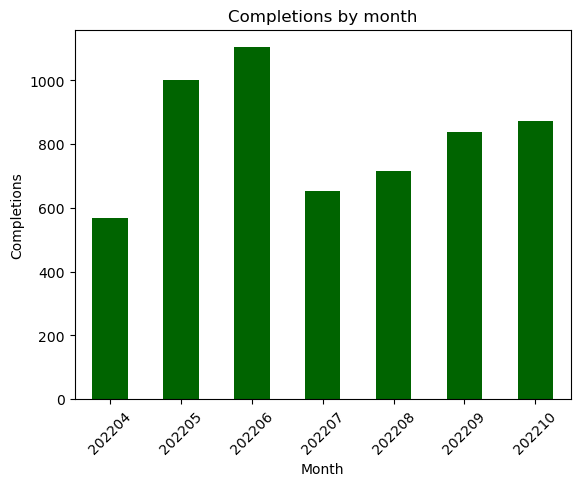

In [31]:
# PLot completions by month for audiences 4-6
import matplotlib.pyplot as plot
nocd.plot(kind="bar", color = 'darkgreen')
plot.xticks(rotation=45, horizontalalignment="center")
plot.title("Completions by month")
plot.xlabel("Month")
plot.ylabel("Completions")


In [32]:
# Determine which creative family had the most number of completions for audience 4-6
noccf = subset.groupby('creative_family')['completions'].sum()

noccf

creative_family
CloseFaster                 58.0
CloserTwins                172.0
CompetitiveOpportunity       8.0
SEM Ads                   5102.0
Trade Media Ads            276.0
UnfairAdvantage            136.0
Name: completions, dtype: float64

Text(0, 0.5, 'Completions')

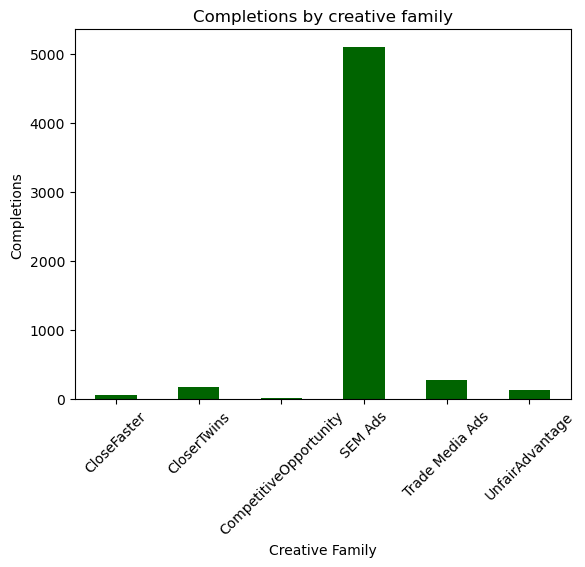

In [33]:
# Plot completions by creative family for audiences 4-6
import matplotlib.pyplot as plot
noccf.plot(kind="bar", color = 'darkgreen')
plot.xticks(rotation=45, horizontalalignment="center")
plot.title("Completions by creative family")
plot.xlabel("Creative Family")
plot.ylabel("Completions")


In [34]:
# initialize list of lists
#Show completion rate by platform
platforms = [['Google SEM', 100], ['LinkedIn', 39.66], ['Trade Media', 100], ['Domain Display', 56.48],
            ['Facebook', 0], ['User ID Display', 38.10], ['OTT', 100]]
  
# Create the pandas DataFrame
compplat = pd.DataFrame(platforms, columns=['Platform', 'Completion rate'])
  
# print dataframe.
compplat

,Platform,Completion rate
0,Google SEM,100.00
1,LinkedIn,39.66
2,Trade Media,100.00
3,Domain Display,56.48
4,Facebook,0.00
5,User ID Display,38.10
6,OTT,100.00


Text(0, 0.5, 'Completion rate')

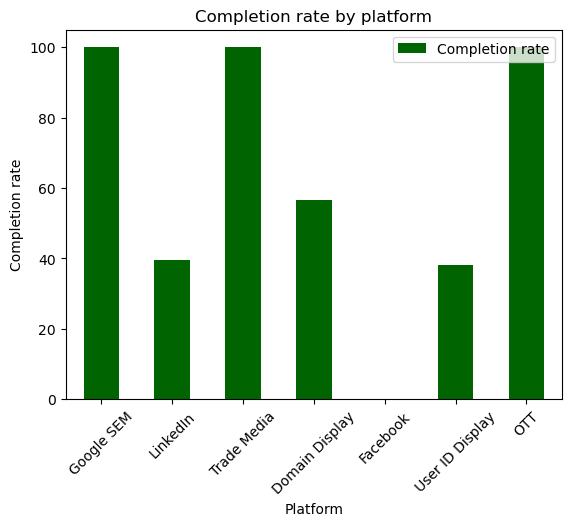

In [35]:
# Plot completions by platform for audiences 4-6
import matplotlib.pyplot as plot
compplat.plot(kind="bar", x='Platform', color = 'darkgreen')
plot.xticks(rotation=45, horizontalalignment="center")
plot.title("Completion rate by platform")
plot.xlabel("Platform")
plot.ylabel("Completion rate")


In [36]:
# aggregate the number of completions per goal by audience groups
# Create new df cpm

cpgc =  subset.groupby(['goal', 'audience'])['completions'].sum().reset_index()

# Print new df

cpgc

,goal,audience,completions
0,4,4.0,1.0
1,Broker Login,4.0,2.0
2,Broker Login,5.0,2.0
3,Broker Login,6.0,19.0
4,Closer Twins Page Video Play,4.0,2.0
5,Closer Twins Page Video Play,5.0,5.0
6,Closer Twins Page Video Play,6.0,36.0
7,Form Submission,4.0,1.0
8,Form Submission,5.0,3.0
9,Form Submission,6.0,100.0


In [37]:
# aggregate the number of completions per month by audience groups
# Create new df cpm

cpm =  goal_stats.groupby(['date', 'audience'])['completions'].sum().reset_index()

# Print new df

cpm

,date,audience,completions
0,202204,1.0,32.0
1,202204,2.0,10.0
2,202204,4.0,7.0
3,202204,5.0,15.0
4,202204,6.0,545.0
5,202205,1.0,9.0
6,202205,2.0,7.0
7,202205,3.0,10.0
8,202205,4.0,9.0
9,202205,5.0,54.0


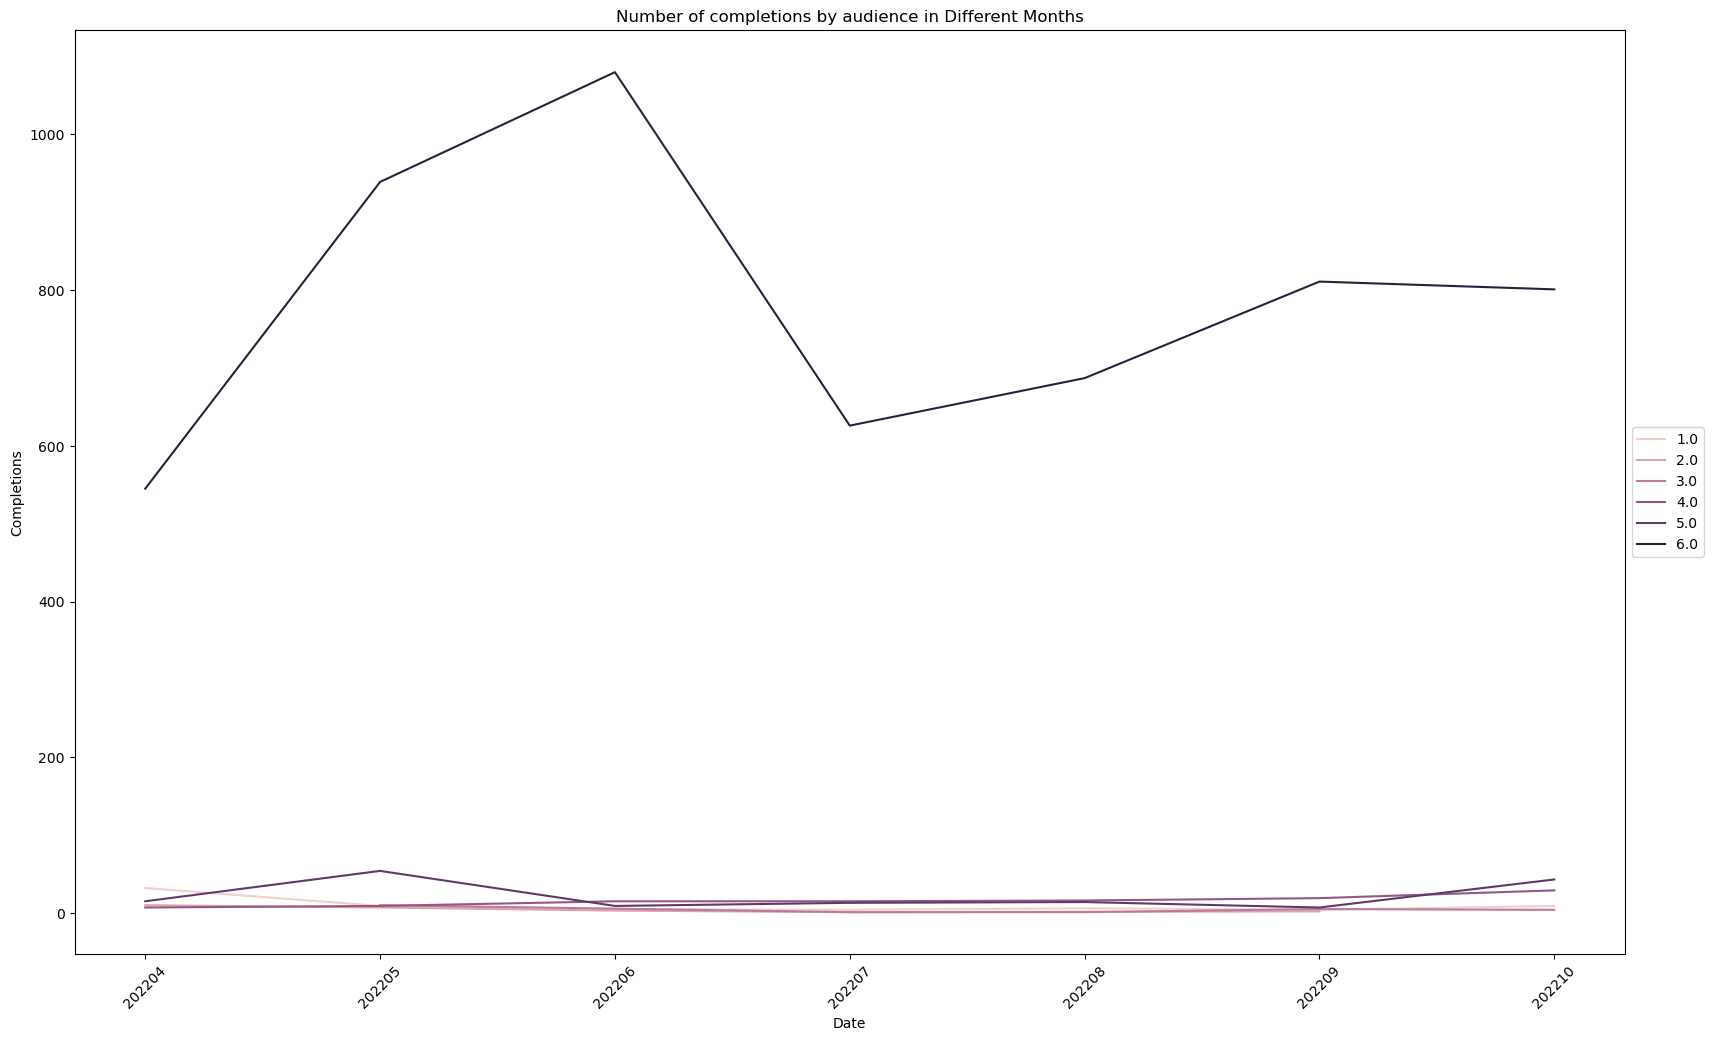

In [38]:
# Create a lineplot.
plt.figure(figsize=(20,12), dpi=100)

cpm_line = sns.lineplot(x='date', y='completions', data=cpm, hue='audience', ci=None)

# Specify the labels
cpm_line.set_xlabel("Date")
cpm_line.set_ylabel("Completions")
cpm_line.set_title("Number of completions by audience in Different Months")


# Rotate x axis labels
plt.xticks(rotation=45)
# Put the legend outside of the figure.
cpm_line.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [39]:
# aggregate the number of completions per month by goal
# Create new df cpm

cpg =  subset.groupby(['date', 'goal'])['completions'].sum().reset_index()

# Print new df

cpg

,date,goal,completions
0,202204,4,1.0
1,202204,Broker Login,13.0
2,202204,Closer Twins Page Video Play,33.0
3,202204,Form Submission,35.0
4,202204,Get Approved,46.0
5,202204,Home Page Video Play,3.0
6,202204,Learn More (Closer Twins Banner),51.0
7,202204,Learn More (Community Mortgage),302.0
8,202204,Learn More (Our Story),26.0
9,202204,Start Closing More,56.0


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

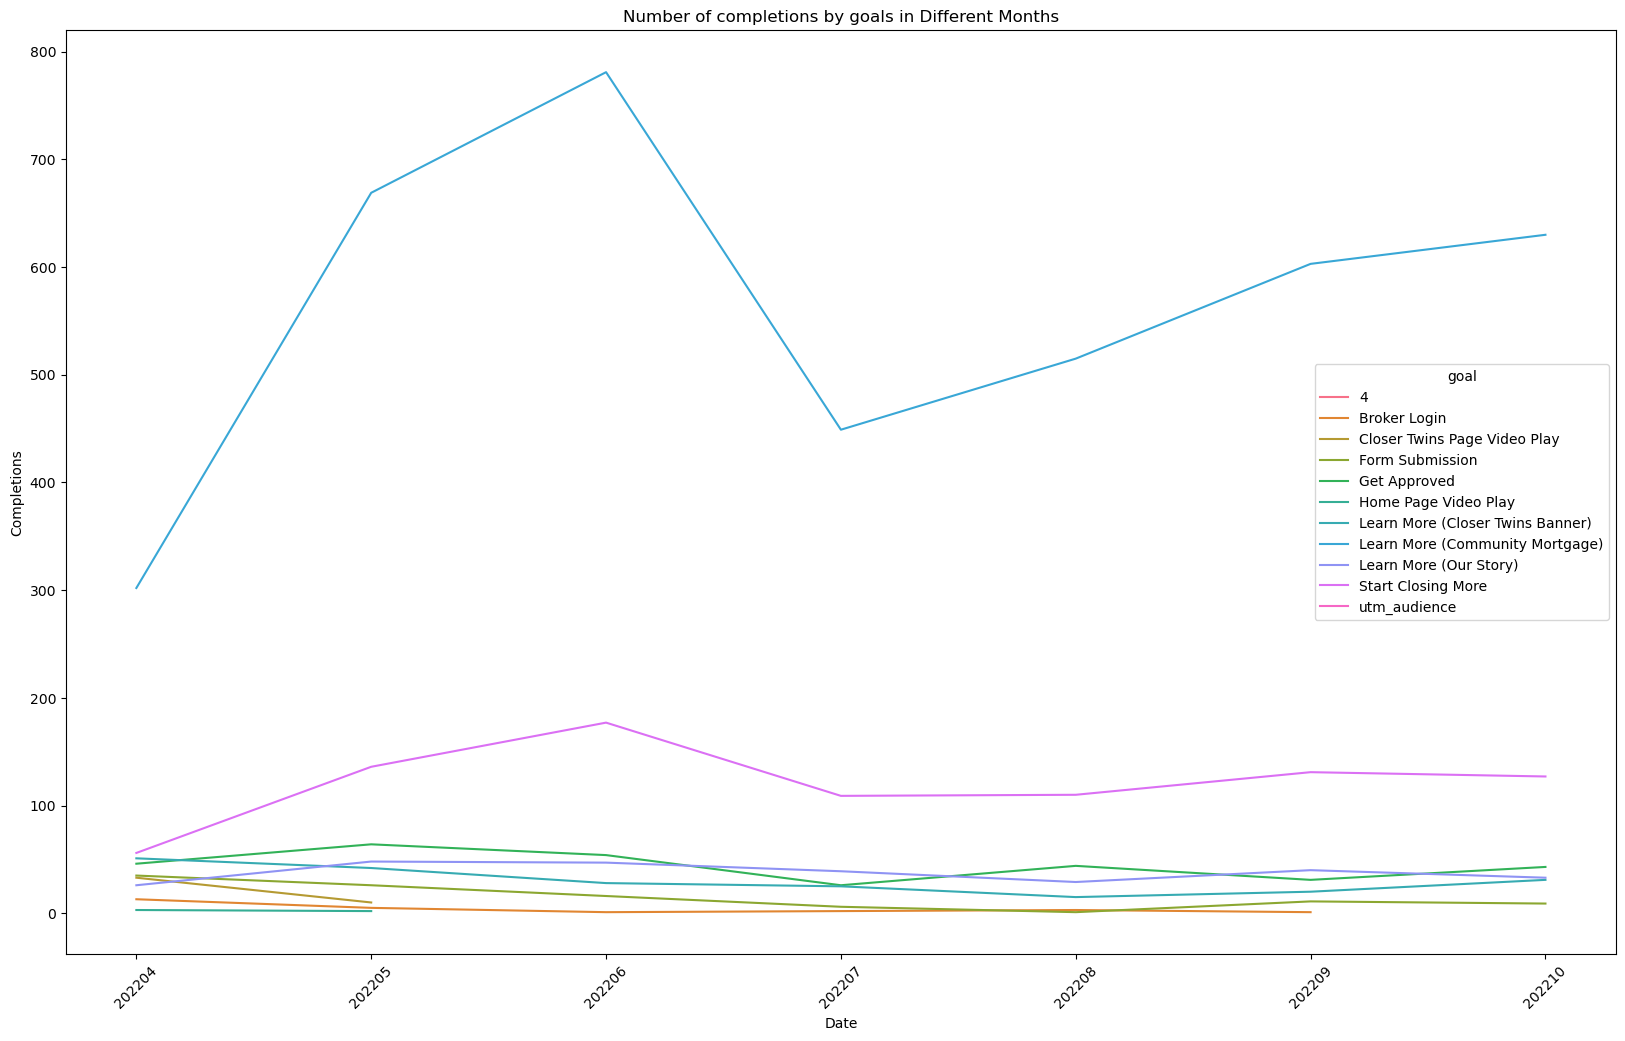

In [40]:
# Create a lineplot.
plt.figure(figsize=(20,12), dpi=100)

cpg_line = sns.lineplot(x='date', y='completions', data=cpg, hue='goal', ci=None)

# Specify the labels
cpg_line.set_xlabel("Date")
cpg_line.set_ylabel("Completions")
cpg_line.set_title("Number of completions by goals in Different Months")


# Rotate x axis labels
plt.xticks(rotation=45)

cpg_line.savefig("cpg_line.png")

In [125]:
# aggregate the number of completions per month by campaign groups
# Create new df cpc

cpc =  subset.groupby(['date', 'campaign'])['completions'].sum().reset_index()

# Print new df

cpc

,date,campaign,completions
0,202204,(not set),391.0
1,202204,FY22_Broker_Campaign,15.0
2,202204,FY22_broker_campaign,8.0
3,202204,FY22_broker_campaign_ph2,16.0
4,202204,FY23_broker_campaign,4.0
5,202204,FY23_change_digital_phase3,133.0
6,202205,(not set),2.0
7,202205,Brand_Exact,717.0
8,202205,Brand_Phrase,107.0
9,202205,FY22_broker_campaign_ph2,58.0


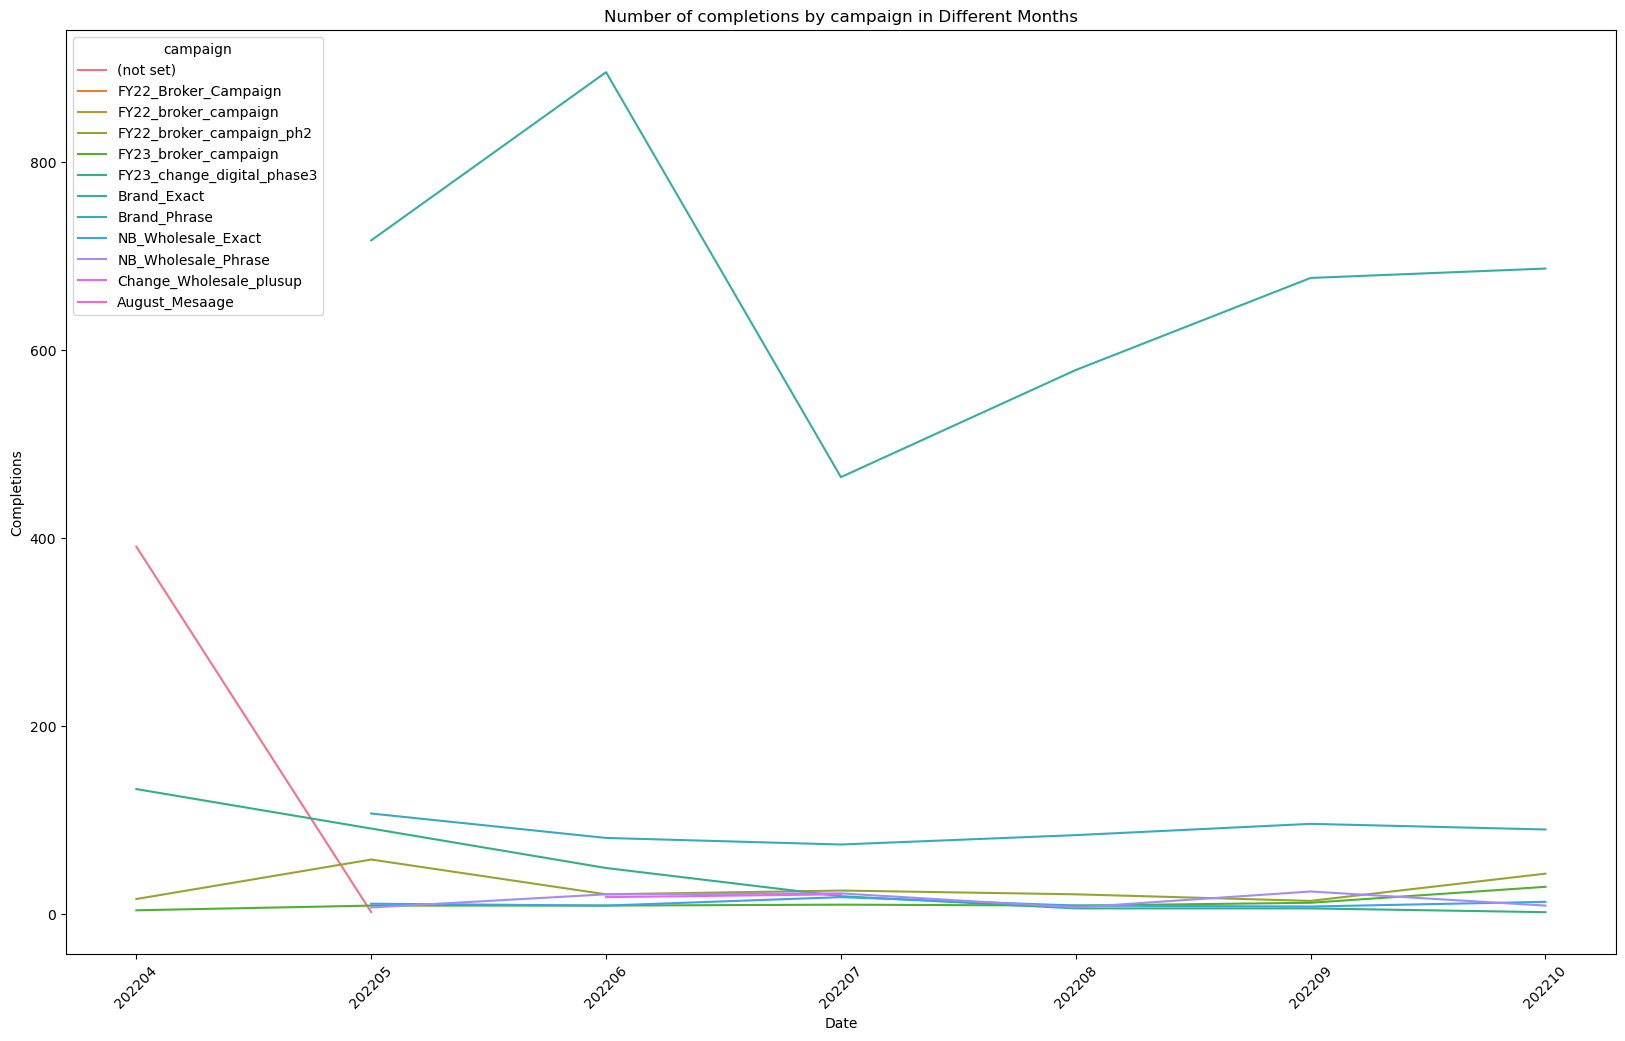

In [126]:
# Create a lineplot.
plt.figure(figsize=(20,12), dpi=100)

cpc_line = sns.lineplot(x='date', y='completions', data=cpc, hue='campaign', ci=None)

# Specify the labels
cpc_line.set_xlabel("Date")
cpc_line.set_ylabel("Completions")
cpc_line.set_title("Number of completions by campaign in Different Months")


# Rotate x axis labels
plt.xticks(rotation=45)
# Put the legend outside of the figure.
cpg_line.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [127]:
# aggregate the number of completions per day by ad format
# Create new df cpaf

cpaf =  subset.groupby(['date', 'ad_format'])['completions'].sum().reset_index()

# Print new df

cpaf

,date,ad_format,completions
0,202204,CPC,389.0
1,202204,Carousel,1.0
2,202204,Housingwire,18.0
3,202204,Inside_mortgage_finance_newsletter,33.0
4,202204,Nmn,7.0
5,202204,Scotsman,75.0
6,202204,Single image,18.0
7,202204,Video,20.0
8,202205,CPC,844.0
9,202205,Carousel,12.0


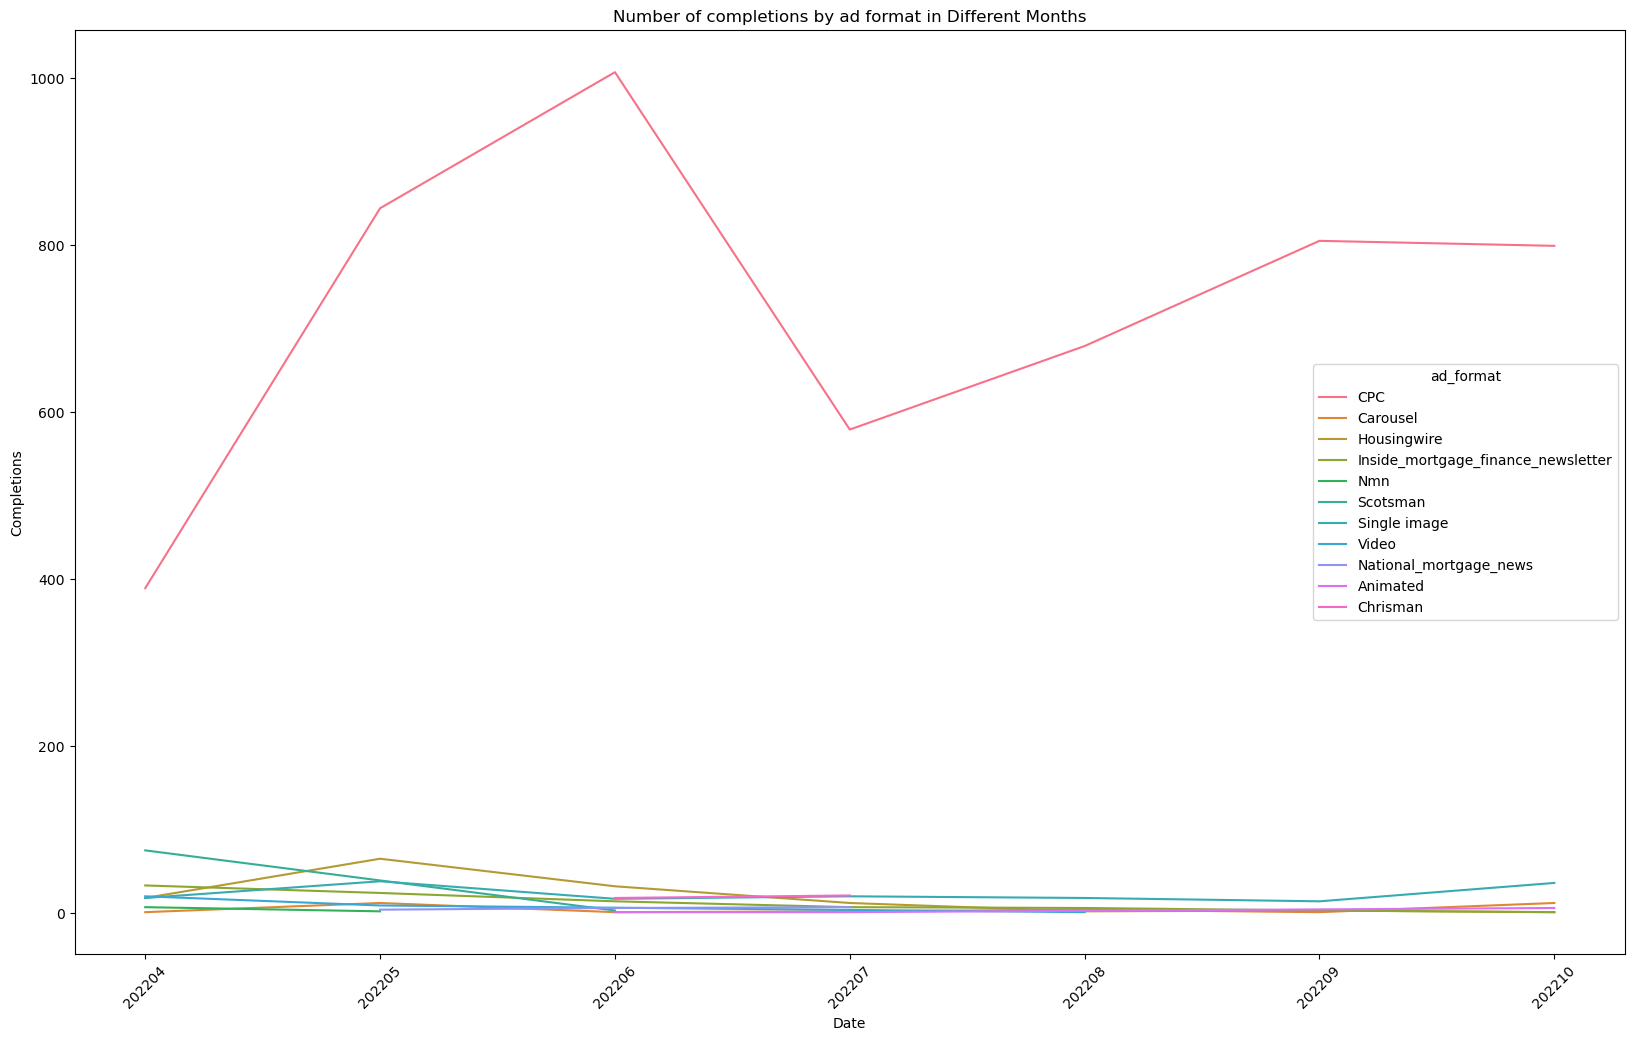

In [128]:
# Create a lineplot.
plt.figure(figsize=(20,12), dpi=100)

cpaf_line = sns.lineplot(x='date', y='completions', data=cpaf, hue='ad_format', ci=None)

# Specify the labels
cpaf_line.set_xlabel("Date")
cpaf_line.set_ylabel("Completions")
cpaf_line.set_title("Number of completions by ad format in Different Months")


# Rotate x axis labels
plt.xticks(rotation=45)
# Put the legend outside of the figure.
cpg_line.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [129]:
# aggregate the number of completions per month by platform
# Create new df cpap

cpap =  subset.groupby(['date', 'platform'])['completions'].sum().reset_index()

# Print new df

cpap

,date,platform,completions
0,202204,Domain Display,7.0
1,202204,Google SEM,389.0
2,202204,LinkedIn,21.0
3,202204,OTT,15.0
4,202204,Trade Media,133.0
5,202205,Domain Display,9.0
6,202205,Google SEM,844.0
7,202205,LinkedIn,54.0
8,202205,Trade Media,95.0
9,202206,Domain Display,6.0


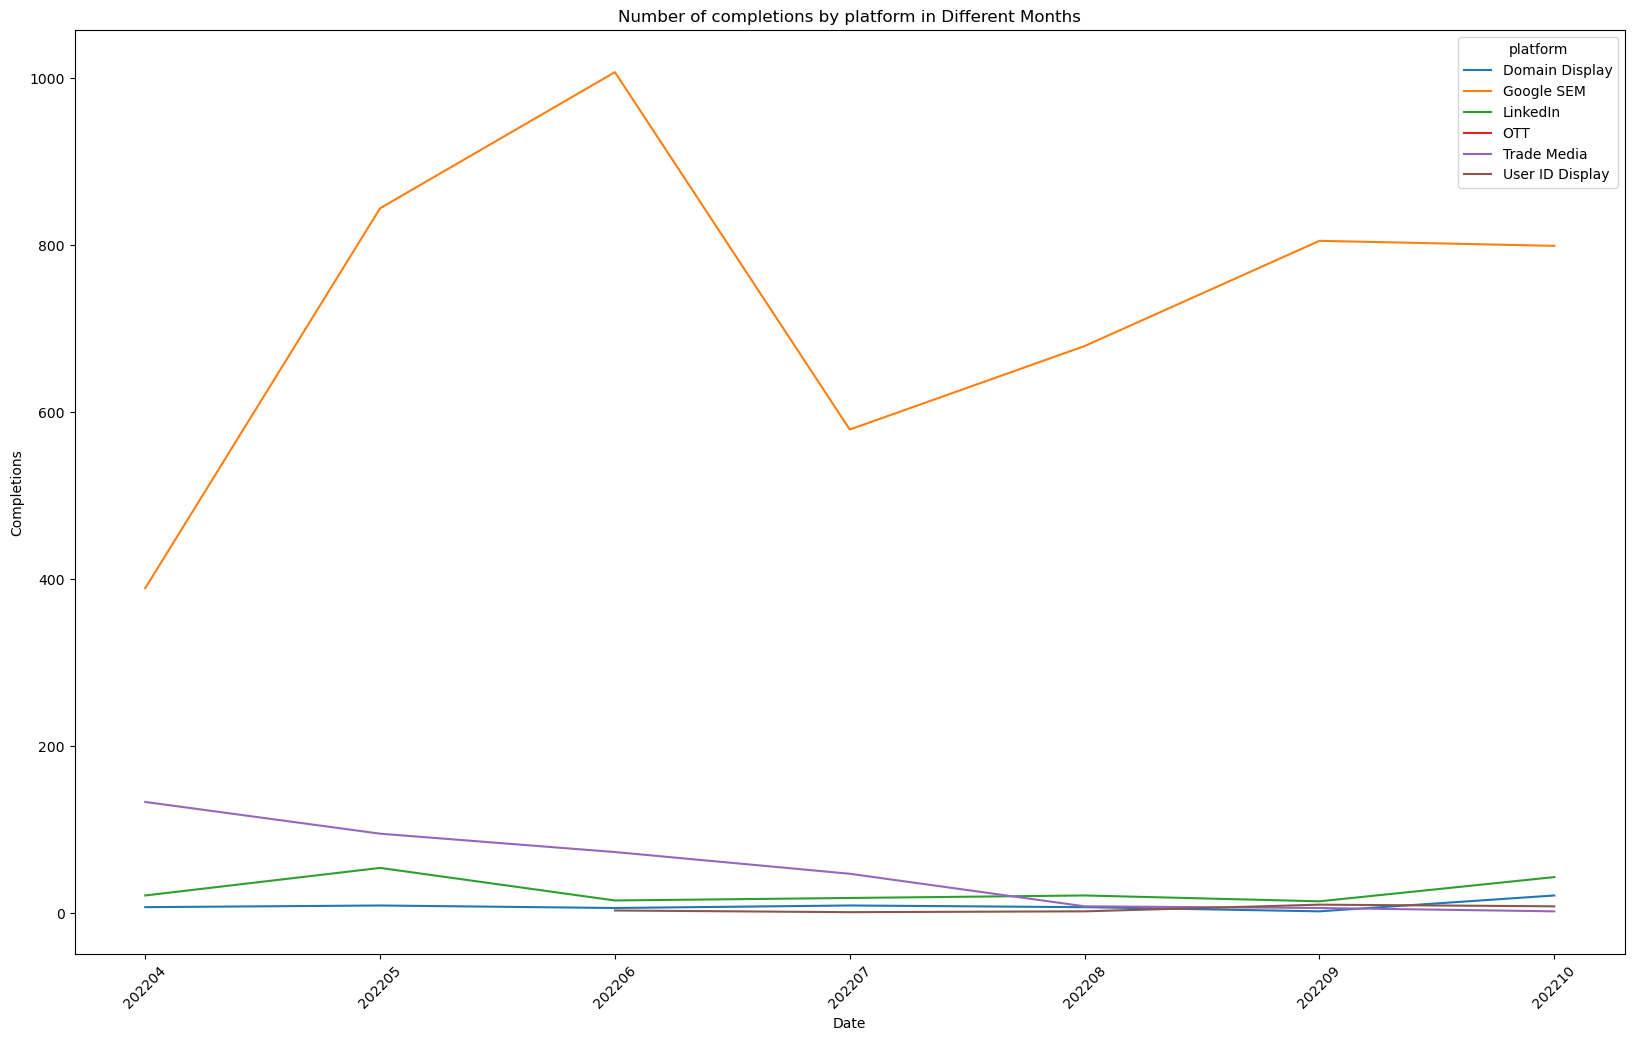

In [130]:
# Create a lineplot.
plt.figure(figsize=(20,12), dpi=100)

cpap_line = sns.lineplot(x='date', y='completions', data=cpap, hue='platform', ci=None)

# Specify the labels
cpap_line.set_xlabel("Date")
cpap_line.set_ylabel("Completions")
cpap_line.set_title("Number of completions by platform in Different Months")


# Rotate x axis labels
plt.xticks(rotation=45)
# Put the legend outside of the figure.
cpg_line.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [131]:
# aggregate the number of completions per month by creative family
# Create new df cpap

cpcf =  subset.groupby(['date', 'creative_family'])['completions'].sum().reset_index()

# Print new df

cpcf

,date,creative_family,completions
0,202204,CloseFaster,5.0
1,202204,CloserTwins,60.0
2,202204,CompetitiveOpportunity,8.0
3,202204,SEM Ads,389.0
4,202204,Trade Media Ads,100.0
5,202204,UnfairAdvantage,3.0
6,202205,CloseFaster,15.0
7,202205,CloserTwins,40.0
8,202205,SEM Ads,844.0
9,202205,Trade Media Ads,71.0


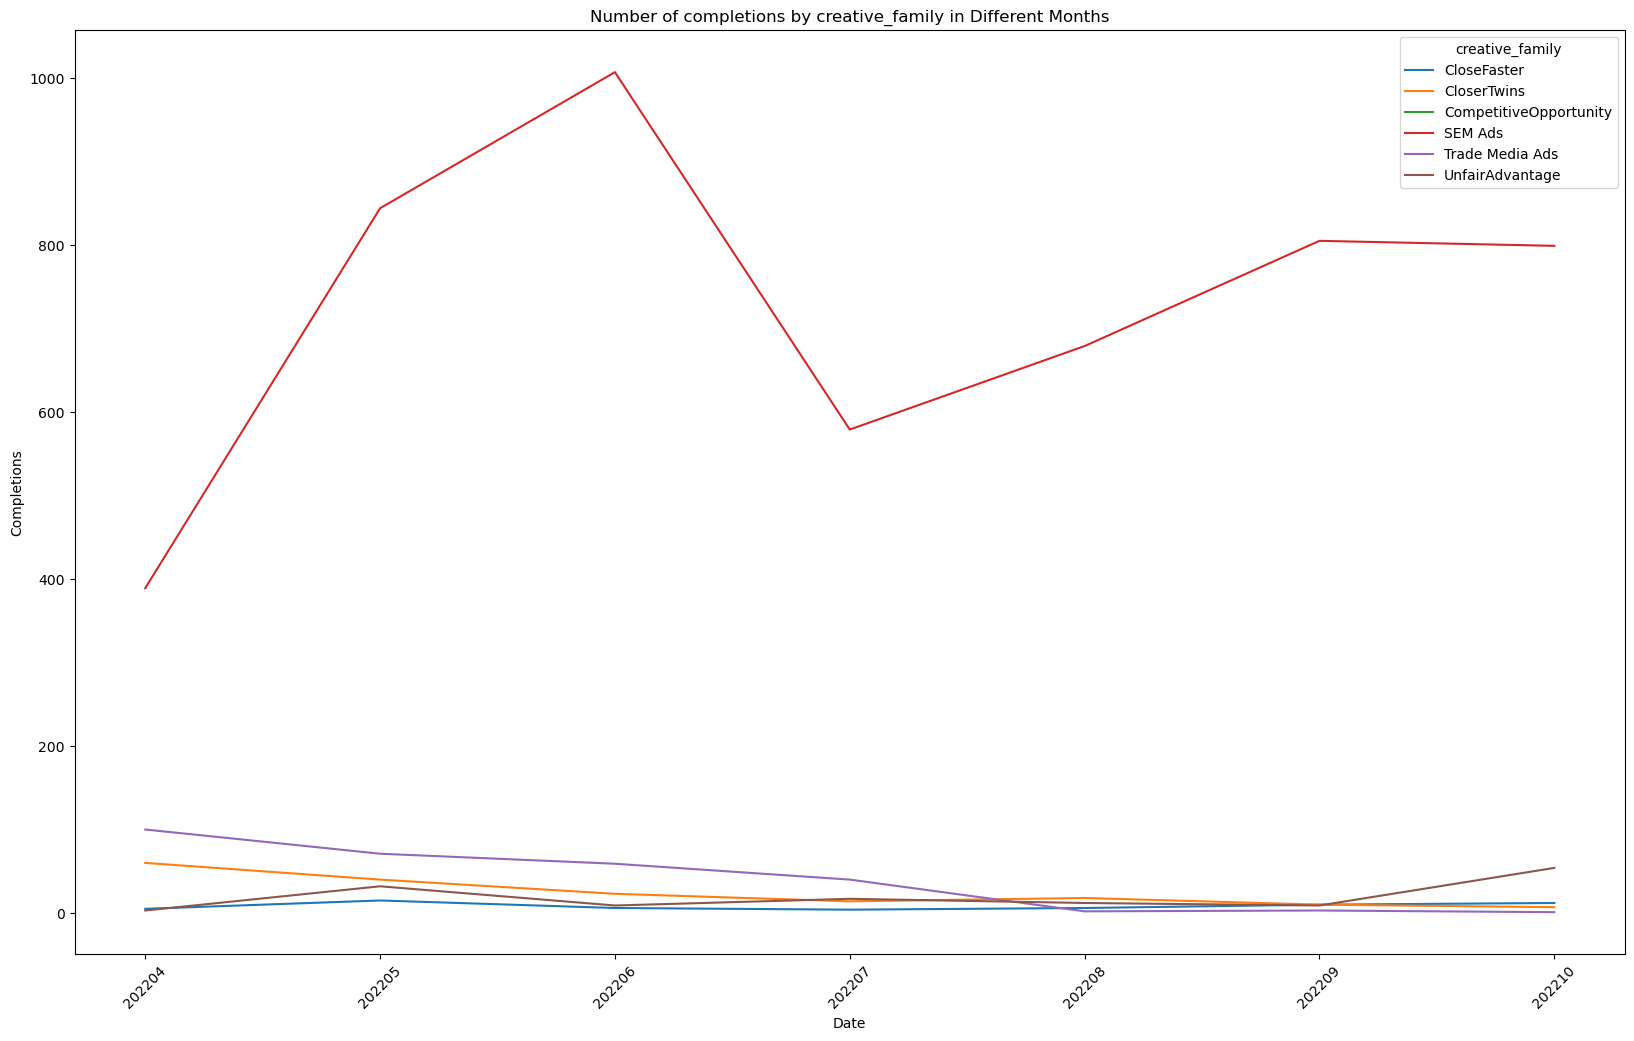

In [132]:
#Create a lineplot.
plt.figure(figsize=(20,12), dpi=100)

cpcf_line = sns.lineplot(x='date', y='completions', data=cpcf, hue='creative_family', ci=None)

# Specify the labels
cpcf_line.set_xlabel("Date")
cpcf_line.set_ylabel("Completions")
cpcf_line.set_title("Number of completions by creative_family in Different Months")


# Rotate x axis labels
plt.xticks(rotation=45)
# Put the legend outside of the figure.
cpg_line.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [133]:
# aggregate the number of completions per month by creative version
# Create new df cpap

cpcv =  subset.groupby(['date', 'creative_version'])['completions'].sum().reset_index()

# Print new df

cpcv

,date,creative_version,completions
0,202204,3steps,2.0
1,202204,All,1.0
2,202204,Cancelingyourlock,4.0
3,202204,Cutdown1A,2.0
4,202204,EarlyBird,5.0
...,...,...,...
116,202210,NoDTI,22.0
117,202210,ROS1,1.0
118,202210,RTB,1.0
119,202210,We Are America's CDFI,7.0


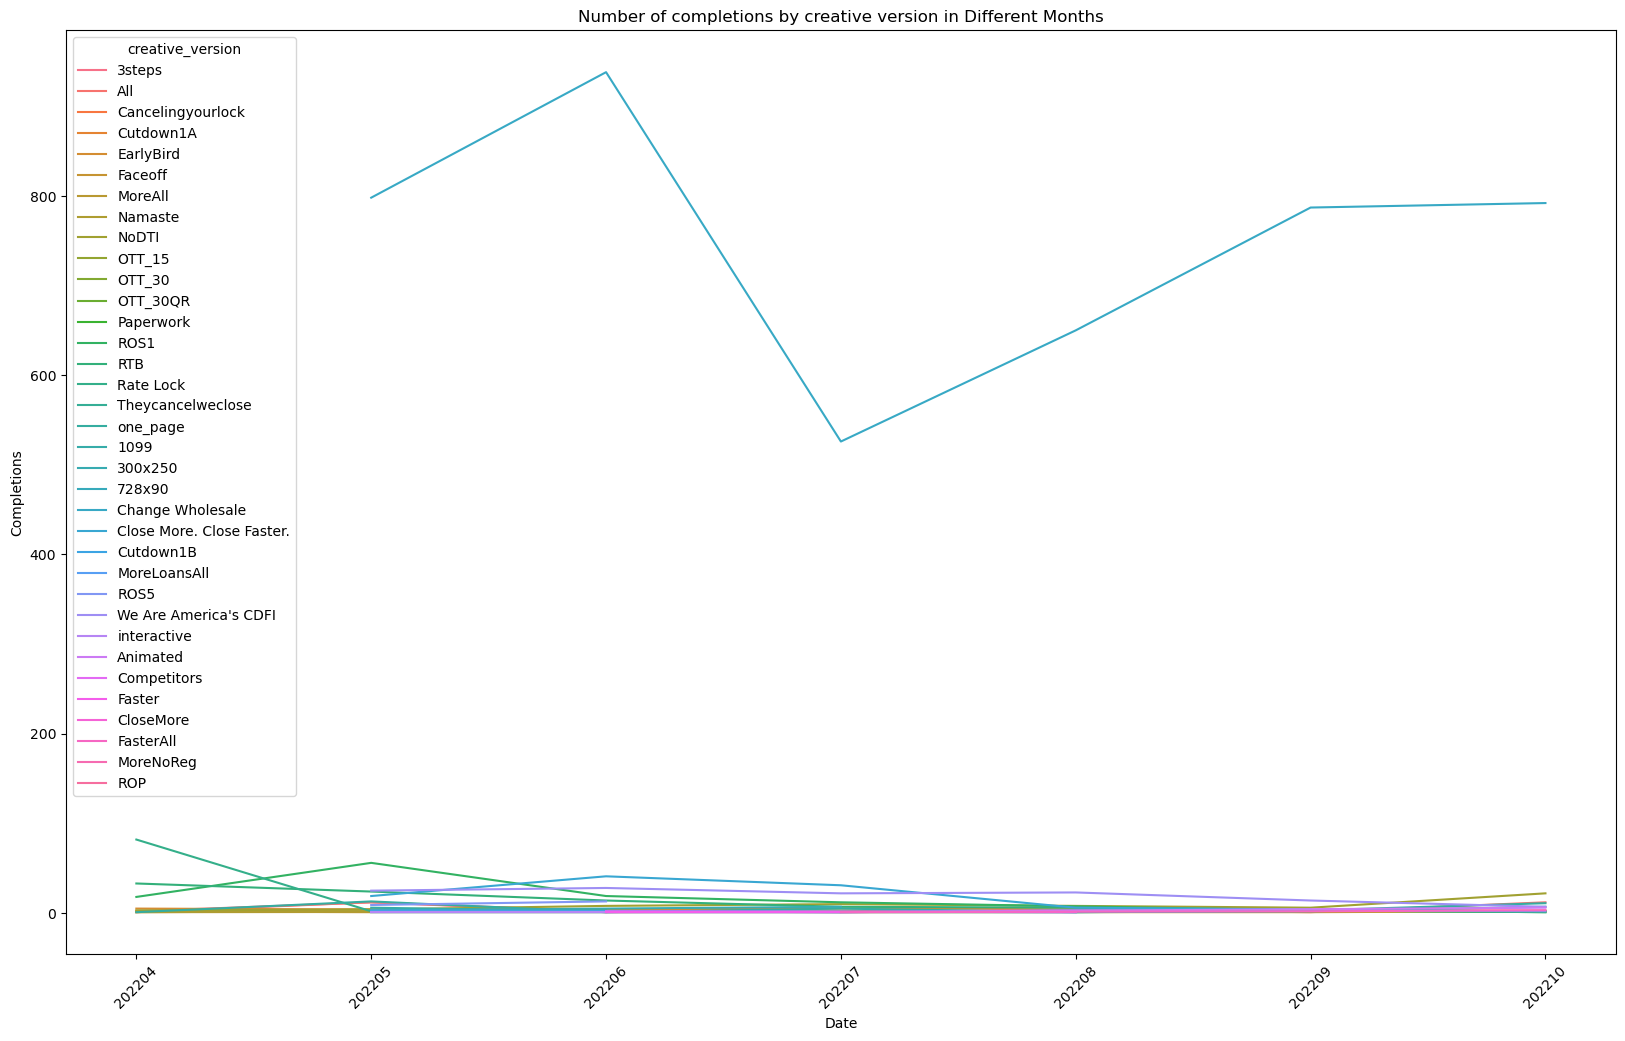

In [134]:
#Create a lineplot.
plt.figure(figsize=(20,12), dpi=100)

cpcv_line = sns.lineplot(x='date', y='completions', data=cpcv, hue='creative_version', ci=None)

# Specify the labels
cpcv_line.set_xlabel("Date")
cpcv_line.set_ylabel("Completions")
cpcv_line.set_title("Number of completions by creative version in Different Months")


# Rotate x axis labels
plt.xticks(rotation=45)
# Put the legend outside of the figure.
cpg_line.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [135]:
# aggregate the number of completions per month by creative version
# Create new df cpap

cpct =  subset.groupby(['date', 'campaign_traffic'])['completions'].sum().reset_index()

# Print new df

cpct

,date,campaign_traffic,completions
0,202204,Campaign,565.0
1,202204,General traffic,2.0
2,202205,Campaign,1002.0
3,202206,Campaign,1086.0
4,202206,General traffic,18.0
5,202207,Campaign,633.0
6,202207,General traffic,21.0
7,202208,Campaign,715.0
8,202208,General traffic,2.0
9,202209,Campaign,837.0


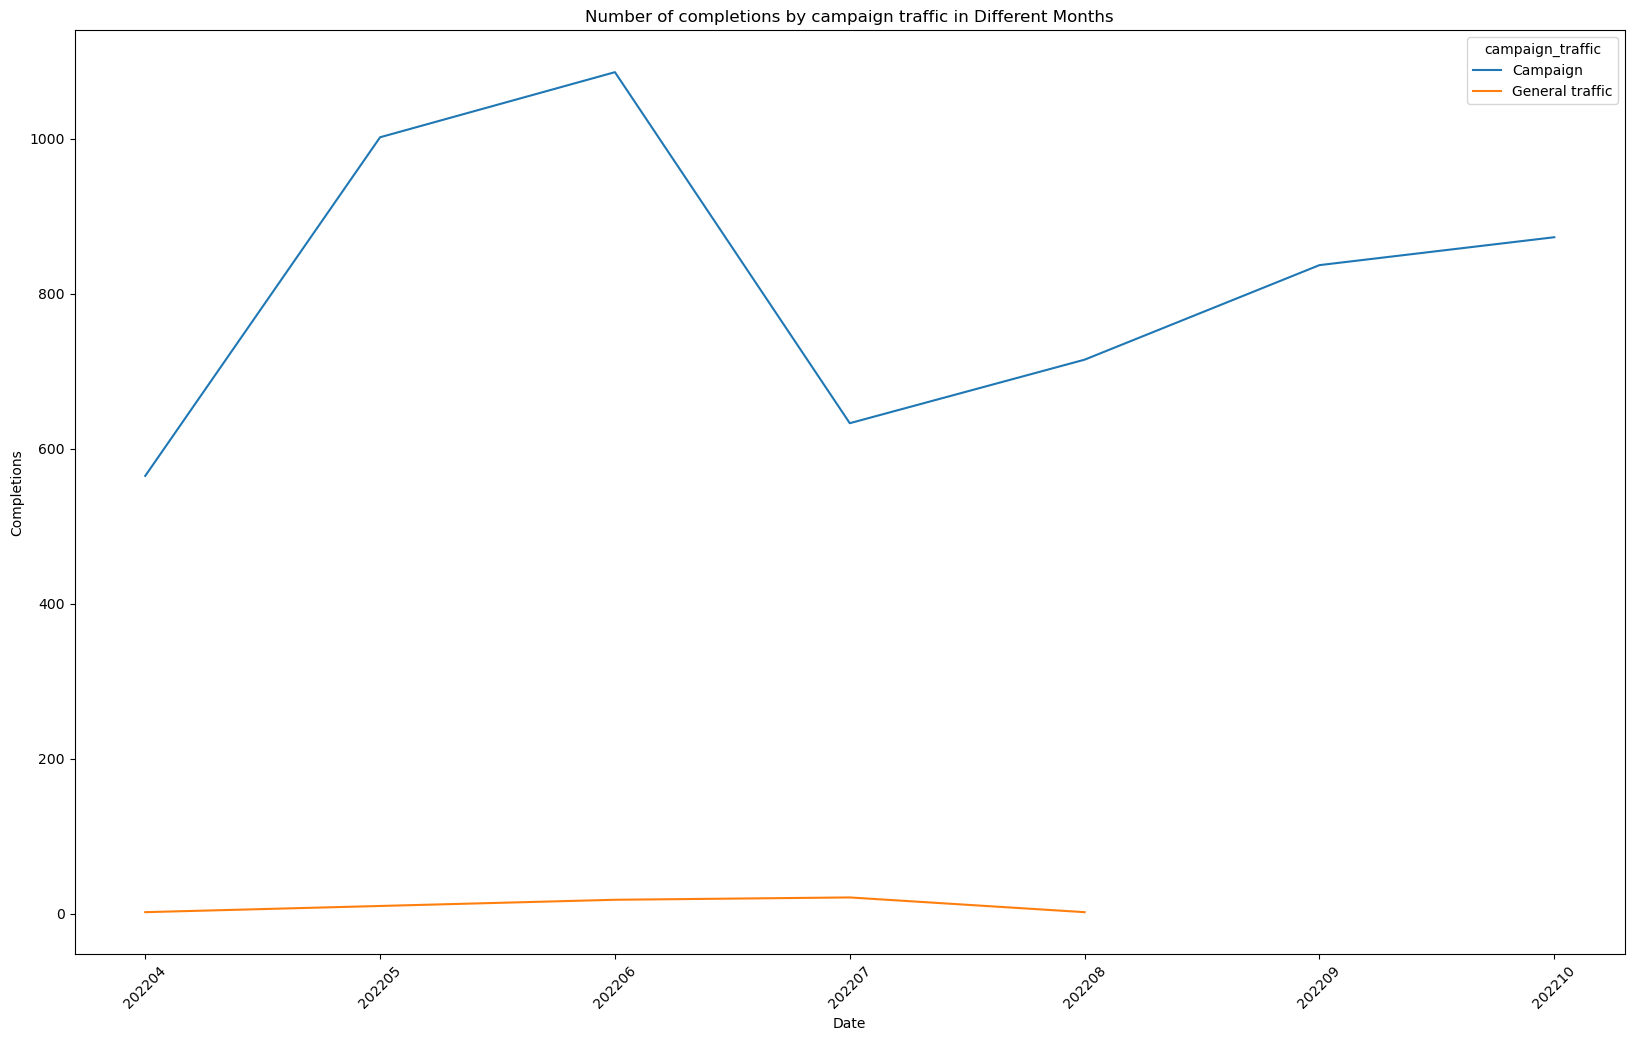

In [136]:
#Create a lineplot.
plt.figure(figsize=(20,12), dpi=100)

cpct_line = sns.lineplot(x='date', y='completions', data=cpct, hue='campaign_traffic', ci=None)

# Specify the labels
cpct_line.set_xlabel("Date")
cpct_line.set_ylabel("Completions")
cpct_line.set_title("Number of completions by campaign traffic in Different Months")


# Rotate x axis labels
plt.xticks(rotation=45)
# Put the legend outside of the figure.
cpg_line.legend(loc='center left', bbox_to_anchor=(1, 0.5))